## **Actividad 6: Solución de problemas**

**2127803 JOSE ANTONIO MARTINEZ CALAN IMC**

---



*LIBRERIAS*




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

Conjunto de datos

In [ ]:
california = fetch_california_housing()

Precio de casas

In [ ]:
df = pd.DataFrame(data=california.data, columns=california.feature_names)

Objetivo

In [ ]:
df['Precio'] = california.target

Procesamiento de datos

In [ ]:
print("Primeras filas del conjunto de datos:")
print(df.head())

Primeras filas del conjunto de datos:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Precio  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


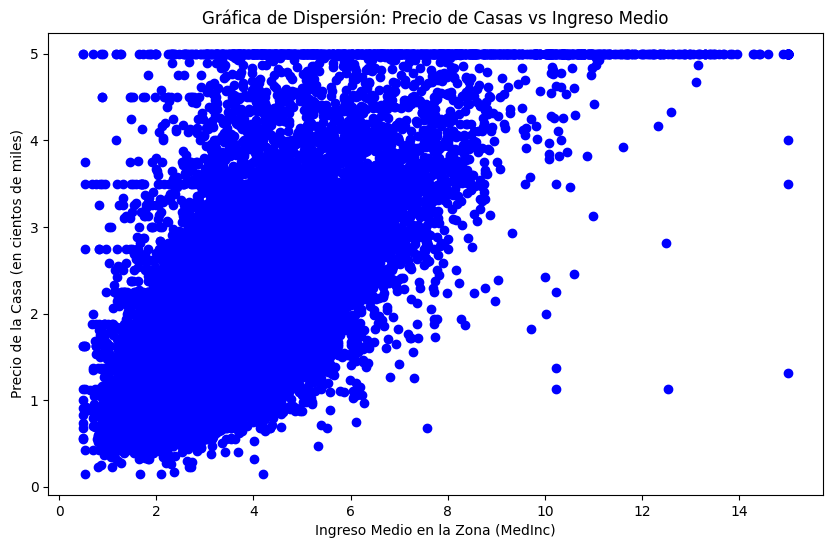

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['MedInc'], df['Precio'], color='blue')
plt.title('Gráfica de Dispersión: Precio de Casas vs Ingreso Medio')
plt.xlabel('Ingreso Medio en la Zona (MedInc)')
plt.ylabel('Precio de la Casa (en cientos de miles)')
plt.show()

Modelo de aprendizaje

In [ ]:
X = df[['MedInc']]  # 'Ingreso medio en la zona
y = df['Precio']    # Precio de la casa

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamiento

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

Predicciones

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio: {mse}")

Error Cuadrático Medio: 0.7091157771765549


In [ ]:
tabla_resultados = pd.DataFrame({
    'Ingreso Medio (MedInc)': X_test['MedInc'],
    'Precio Real': y_test,
    'Precio Predicho': y_pred
})

In [ ]:
tabla_resultados = tabla_resultados.round(2)

In [ ]:
resumen = tabla_resultados.describe()

In [ ]:
print("\nResumen Estadístico de las Predicciones vs Valores Reales:")
print(resumen)


Resumen Estadístico de las Predicciones vs Valores Reales:
       Ingreso Medio (MedInc)  Precio Real  Precio Predicho
count             4128.000000  4128.000000      4128.000000
mean                 3.830320     2.055039         2.050792
std                  1.881576     1.144867         0.788940
min                  0.500000     0.150000         0.650000
25%                  2.550000     1.190000         1.510000
50%                  3.500000     1.790000         1.910000
75%                  4.650000     2.630000         2.390000
max                 15.000000     5.000000         6.730000


In [ ]:
print("\nTabla de Predicciones (Primeras y Últimas Filas):")
print(pd.concat([tabla_resultados.head(3), tabla_resultados.tail(3)]))


Tabla de Predicciones (Primeras y Últimas Filas):
       Ingreso Medio (MedInc)  Precio Real  Precio Predicho
20046                    1.68         0.48             1.15
3024                     2.53         0.46             1.51
15663                    3.48         5.00             1.90
18086                    9.23         5.00             4.32
2144                     2.78         0.72             1.61
3665                     3.55         1.52             1.93


Resultado del entrenamiento

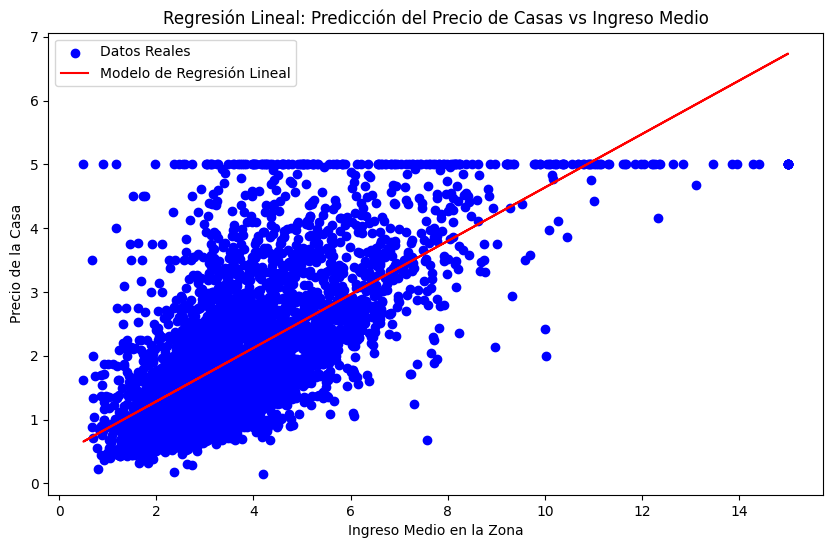

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Datos Reales")
plt.plot(X_test, y_pred, color="red", label="Modelo de Regresión Lineal")
plt.title("Regresión Lineal: Predicción del Precio de Casas vs Ingreso Medio")
plt.xlabel("Ingreso Medio en la Zona")
plt.ylabel("Precio de la Casa")
plt.legend()
plt.show()